# 一、获取数据

1.导入sklearn的数据集模块

In [1]:
from sklearn import datasets

2.导入预置的手写数字数据集

In [2]:
import matplotlib.pyplot as plt

digits = datasets.load_digits() # shape = (1797, 8, 8)

plt.matshow(digits.images[0])
plt.show()

<Figure size 480x480 with 1 Axes>

3.生成数据用于聚类，100个样本，2个特征，5个类

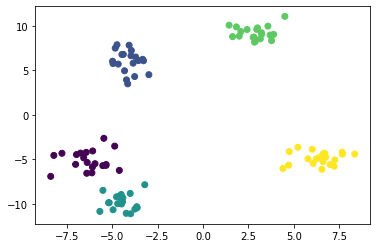

In [3]:
data, label = datasets.make_blobs(n_samples = 100, n_features = 2, centers = 5) # 随机生成数据以及标签

plt.scatter(data[:, 0], data[:, 1], c = label)
plt.show()

# 二、数据预处理

4.导入sklearn数据预处理模块

In [4]:
from sklearn import preprocessing

5.计算一组数据的平均值和标准差（scaler）

In [5]:
data = [[0, 0], [1, 0], [-1, 1], [1, 2]]

scalerstd = preprocessing.StandardScaler().fit(data)

print(scalerstd.mean_) # 两个维度上的均值
print(scalerstd.var_) # 两个维度分别的方差

[0.25 0.75]
[0.6875 0.6875]


6.使用上一题的scaler标准化现有数据

In [6]:
scalerstd.transform(data)

array([[-0.30151134, -0.90453403],
       [ 0.90453403, -0.90453403],
       [-1.50755672,  0.30151134],
       [ 0.90453403,  1.50755672]])

7.用最小最大规范化对数据进行线性变换，变换到[0,1]区间

In [7]:
scalermm = preprocessing.MinMaxScaler(feature_range = (0, 1)).fit(data)
scalermm.transform(data)

array([[0.5, 0. ],
       [1. , 0. ],
       [0. , 0.5],
       [1. , 1. ]])

8.用L2正则化对数据进行变换

In [8]:
X = [[1., -1., 2.],
    [2., 0., 0.],
    [0., 1., -1.]]

scalernorm = preprocessing.Normalizer(norm = 'l2').fit(X)
scalernorm.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

9.对现有数据进行one-hot编码

In [9]:
# 4个数据，每个数据有三个不同的属性，one-hot将第一个属性编码成两位，第二个属性三位，第三个属性四位
data = [[0, 0, 3],
       [1, 1, 0],
       [0, 2, 1],
       [1, 0, 2]]

scaleronehot = preprocessing.OneHotEncoder().fit(data)
scaleronehot.transform(data).toarray()

C:\Users\89500\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0.]])

可以看出，每一个属性都被编码成了位数相同的one-hot码

10.给定阈值，将特征转换为0/1

In [10]:
data = [[0, 0], [1, 0], [-1, 1], [1, 2]]

scalerbin = preprocessing.Binarizer(threshold = 0.5)
scalerbin.transform(data)

array([[0, 0],
       [1, 0],
       [0, 1],
       [1, 1]])

可以看出，在阈值0.5以上的值都变为了1，其余的都是0

11.对现有数据进行标签编码

In [11]:
scalerlabel = preprocessing.LabelEncoder()
scalerlabel.fit(['paris', 'paris', 'tokyo', 'amsterdam','bb', 'cc'])
scalerlabel.transform(['tokyo', 'tokyo', 'paris','bb', 'cc', 'amsterdam'])

array([4, 4, 3, 1, 2, 0], dtype=int64)

可以看出，每一个标签都被编码成了一个整数（按照首字母顺序）

# 三、数据集拆分

12.导入波士顿房价数据集，将数据划分为训练集和测试集，测试集数量占比为30%

In [12]:
from sklearn import model_selection

dataset = datasets.load_boston() # 共有506条数据，13个属性
print(dataset.data.shape)

X_train, X_test, y_train, y_test = model_selection.train_test_split(dataset['data'], dataset['target'], test_size = 0.3)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(506, 13)
(354, 13) (152, 13) (354,) (152,)


13.将现有数据分为3折

In [13]:
import numpy as np
X = np.array(['a', 'b', 'c', 'd', 'e', 'f'])

kfold = model_selection.KFold(n_splits = 3)

for train, test in kfold.split(X):
    print('%s %s' % (X[train], X[test]))

['c' 'd' 'e' 'f'] ['a' 'b']
['a' 'b' 'e' 'f'] ['c' 'd']
['a' 'b' 'c' 'd'] ['e' 'f']


可以看出，六个数据样本分别在三折数据的测试集中出现

# 四、使用模型

14.定义一个线性回归模型

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True, normalize = False, copy_X = True, n_jobs = 1)

15.导入预置的波士顿房价数据集

In [15]:
X, y = datasets.load_boston(return_X_y = True)

16.设置房价为Y，剩余参数为X，30%为测试集

In [16]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3)

17.用线性回归模型拟合波士顿房价数据集

In [17]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

18.用训练完的模型进行预测

In [18]:
model.predict(X_test)

array([31.64923576, 13.51422602, 27.39466877, 19.59201173, 23.30634005,
       23.69146181, 21.20856065, 27.15399805, 36.21863009, 16.5261406 ,
       22.22527904, 25.21206797, 24.33388527, 14.09674894, 22.73804911,
       16.00910526, 25.1334197 , 21.48548137, 20.21202859, 17.87623535,
       23.52706493, 23.41781505, 29.19534743, 26.83285962, 28.07656316,
       25.08846896, 23.15326415, 18.73933371, 14.40642238, 30.54418297,
       19.08731228, 15.30501081,  9.37481752, 34.33665728, 33.6740399 ,
       18.00781714, 35.33120998, 21.87232944, 18.77010703, 28.72850979,
       35.94815398, 22.21053268, 43.1840599 , 34.71589988, 23.39593572,
       19.3844032 , 13.44782708, 26.73866235, 23.10827992, 18.02134768,
       30.82646296, 29.22352599, 15.40867137, 23.98232926, 15.70140596,
       23.71664314,  8.55125452, 25.13861568, 22.9016868 , 34.02814082,
       23.2277703 , 26.14770363, 21.87171548, 16.08593775, 29.43043713,
       20.6065425 , 27.46933955, 12.37256737, 17.85040083, 15.84

19.输出线性回归模型的斜率和截距

In [19]:
print(model.coef_)
print(model.intercept_)

[-1.05894724e-01  3.82714355e-02  1.01887206e-03  2.07109735e+00
 -1.90128892e+01  3.64052866e+00  1.99403540e-03 -1.43490890e+00
  3.22126076e-01 -1.31711127e-02 -9.10414542e-01  8.40778214e-03
 -5.00183265e-01]
37.76666192113291


# 五、评估

20.使用随机森林对鸢尾花数据集进行预测，n_estimators = 100

In [20]:
from sklearn.ensemble import RandomForestClassifier

# 读取鸢尾花数据集并进行数据分割
X, y = datasets.load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3)

# 设置模型并进行拟合
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred

array([1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 0,
       2, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 0, 0, 2, 2, 1,
       0])

21.给随机森林模型打分

In [21]:
clf.score(X, y)

0.9866666666666667

22.输出模型的precision_score, recall_score, f1_score

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.87      1.00      0.93        13
           2       1.00      0.83      0.91        12

    accuracy                           0.96        45
   macro avg       0.96      0.94      0.95        45
weighted avg       0.96      0.96      0.96        45



23.使用手写数字数据集，随机森林算法进行分类，画出学习曲线

C:\Users\89500\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


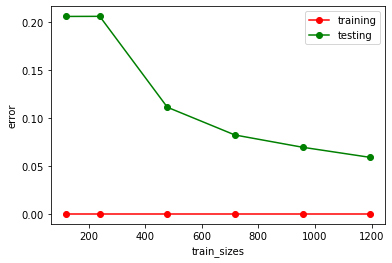

In [23]:
from sklearn.model_selection import learning_curve

# 设置手写数字数据集
X, y = datasets.load_digits(return_X_y = True)

# 使用学习曲线函数设置模型、数据、学习进度、评价标准，并进行数据的拟合
train_sizes, train_score, test_score = learning_curve(RandomForestClassifier(n_estimators = 100), X, y, 
                                                      train_sizes = [0.1, 0.2, 0.4, 0.6, 0.8, 1], scoring = 'accuracy')

# 误差率 = 1 - 得分
train_error = 1 - np.mean(train_score, axis = 1)
test_error = 1 - np.mean(test_score, axis = 1)

plt.plot(train_sizes, train_error, 'o-', color = 'r', label = 'training')
plt.plot(train_sizes, test_error, 'o-', color = 'g', label = 'testing')
plt.legend()
plt.xlabel('train_sizes')
plt.ylabel('error')
plt.show()

24.使用手写数字数据集，随机森林算法进行分类，参数n_estimator选择范围为[10, 20, 40, 80, 160, 250]，画出验证曲线

(6, 10) (6, 10)


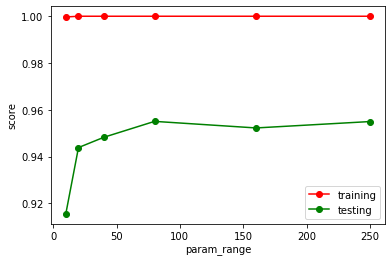

In [24]:
from sklearn.model_selection import validation_curve

# 设置手写数字数据集
X, y = datasets.load_digits(return_X_y = True)

# 设置参数范围并使用验证曲线函数设置模型、数据、参数、范围、交叉验证折数并进行拟合
param_range = [10, 20, 40, 80, 160, 250]
train_score, test_score = validation_curve(RandomForestClassifier(), X, y, param_name = 'n_estimators', 
                                           param_range = param_range, cv = 10, scoring = 'accuracy')

# 将十次交叉验证的得分求均值
print(train_score.shape, test_score.shape)
train_score = np.mean(train_score, axis = 1)
test_score = np.mean(test_score, axis = 1)

plt.plot(param_range, train_score, 'o-', color = 'r', label = 'training')
plt.plot(param_range, test_score, 'o-', color = 'g', label = 'testing')
plt.legend()
plt.xlabel('param_range')
plt.ylabel('score')
plt.show()

25.使用网格搜索，得到手写数字数据集在随机森林算法下的最优参数

In [25]:
from sklearn.model_selection import GridSearchCV

X, y = datasets.load_digits(return_X_y = True)

#随机森林的参数
tree_param_grid = {'min_samples_split':[3, 6, 9],
                  'n_estimators':[10, 50, 100]}

# 定义模型，设置搜索的参数，交叉验证为5折
grid = GridSearchCV(RandomForestClassifier(), param_grid = tree_param_grid, cv = 5)
grid.fit(X, y)

# 搜索结果
grid.best_estimator_, grid.best_score_, grid.best_params_

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=3,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 0.9404563160823595,
 {'min_samples_split': 3, 'n_estimators': 100})

26.取鸢尾花数据集中，类型=0,1的数据，变成一个二分类问题，使用线性内核的SVM进行拟合

In [26]:
from sklearn import svm

# 取类型=0，1的数据
X, y = datasets.load_iris(return_X_y = True)
X, y = X[y != 2], y[y != 2]

# 加一些噪音防止模型太准
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# 分割数据集
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 0)

# 定义模型并拟合
svm = svm.SVC(kernel = 'linear', probability = True)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

27.计算相应的ROC曲线

Text(0, 0.5, 'TPR')

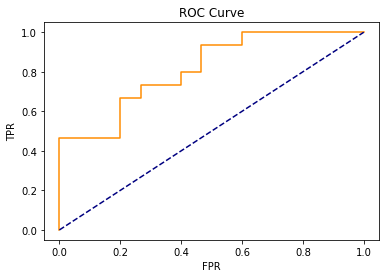

In [27]:
from sklearn.metrics import roc_curve, auc

y_score = svm.decision_function(X_test) # 相当于计算分类概率（样本点到分隔超平面的距离），用来将样本排序

fpr, tpr, threshold = roc_curve(y_test, y_score) # 计算假正例率，真正例率，作为绘图的点

# 绘图
plt.plot(fpr, tpr, color = 'darkorange')
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

28.计算对应的AUC

In [28]:
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8133333333333334


# 六、降维

29.生成一组数据，10000个样本，3个特征，4个簇

C:\Users\89500\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


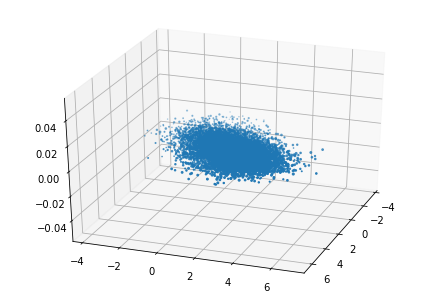

In [29]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# 生成数据
X, y = datasets.make_blobs(n_samples = 10000, n_features = 3, centers = [[3,3,3], [0,0,0], [1,1,1], [2,2,2]], random_state = 9)

# 展示数据
fig = plt.figure()
ax = Axes3D(fig, rect = [0, 0, 1, 1], elev = 30, azim = 20)
plt.scatter(X[:, 0], X[:, 1], X[:, 2], marker = 'o') # 图中只能显示出中心为[0,0,0]的那一个簇

30.对数据进行PCA同维度数量的投影，展示投影后的三个维度的分布

In [30]:
# 指定PCA降维到3
pca = PCA(n_components = 3)
pca.fit(X)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

[0.70623266 0.14753827 0.14622907]
[4.77770485 0.99810492 0.98924813]


31.将数据从3维降低为2维

[0.70623266 0.14753827]
[4.77770485 0.99810492]


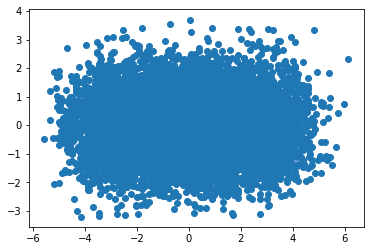

In [31]:
# 指定PCA降维到2
pca = PCA(n_components = 2)
pca.fit(X)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

X_new = pca.transform(X) # 将数据投影到PCA计算出的超平面上
plt.scatter(X_new[:, 0], X_new[:, 1], marker = 'o')

32.指定降维后主成分方差的比例（99%）进行降维

In [32]:
pca = PCA(n_components = 0.99)
pca.fit(X)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_) # 降维后还有多少维

[0.70623266 0.14753827 0.14622907]
[4.77770485 0.99810492 0.98924813]
3


33.使用MLE算法，自动选择降维维度

In [33]:
# 使用MLE算法进行PCA
pca = PCA(n_components = 'mle')
pca.fit(X)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.n_components_) # 降维后还有多少维

[0.70623266]
[4.77770485]
1


34.生成一组数据，10000个样本，3个特征，4个类别

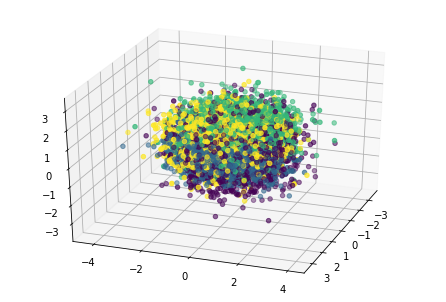

In [34]:
# 生成数据
X2, y2 = datasets.make_classification(n_samples = 10000, n_features = 3, n_redundant = 0, n_classes = 4, 
                                      n_informative = 2, n_clusters_per_class = 1, class_sep = 0.5, random_state = 10)

# 画图
fig = plt.figure()
ax = Axes3D(fig, rect = [0, 0, 1, 1], elev = 30, azim = 20)
ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2], marker = 'o', c = y2)

可以看出上图有蓝绿色、紫色、黄色、深蓝色四种样本

35.对数据进行LDA降维

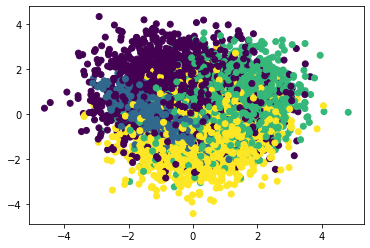

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(X2, y2)
X2_new = lda.transform(X2)
plt.scatter(X2_new[:, 0], X2_new[:, 1], marker = 'o', c = y2)

经过LDA降维后，各个类别的数据点尽可能地分开了